### import important library

In [4]:
import os
import csv
import pandas as pd
import numpy as np
from datetime import datetime
from datetime import date as dt
import pandas_ta as ta
import matplotlib.pyplot as plt
import mibian as mb
import seaborn as sns

In [5]:

print(os.getcwd())

/Users/healofy101/Downloads/final_project-2


### Input - Option Data  2015-2020

#####  for BankNifty ---> use `weeklyBANKNIFTY.csv`
##### for Nifty -----> use `weeklyNIFTY.csv`

In [667]:
select_contract = "BANKNIFTY"

In [668]:
input_data = pd.read_csv("weeklyBANKNIFTY.csv",
                        names=["contract","date","type","strike_price","expiry","open","high","low","close","oi","month_type"])


In [669]:
input_data

,contract,date,type,strike_price,expiry,open,high,low,close,oi,month_type
0,BANKNIFTY,20160527,CE,13900,20160630,0.0,0.00,0.00,2057.50,0,Near
1,BANKNIFTY,20160527,CE,14000,20160630,3300.0,3392.45,3300.00,3350.00,57540,Near
2,BANKNIFTY,20160527,CE,14100,20160630,0.0,0.00,0.00,2080.90,0,Near
3,BANKNIFTY,20160527,CE,14200,20160630,0.0,0.00,0.00,2005.35,0,Near
4,BANKNIFTY,20160527,CE,14300,20160630,0.0,0.00,0.00,1931.20,0,Near
...,...,...,...,...,...,...,...,...,...,...,...
432233,BANKNIFTY,20201231,PE,33900,20201231,0.0,0.00,0.00,2574.00,175,Near
432234,BANKNIFTY,20201231,PE,34000,20201231,2714.7,2789.75,2712.85,2789.75,450,Near
432235,BANKNIFTY,20201231,PE,34100,20201231,0.0,0.00,0.00,2771.90,0,Near
432236,BANKNIFTY,20201231,PE,34200,20201231,0.0,0.00,0.00,2871.60,0,Near


### Change and Select contract

In [670]:
# select_contract = "NIFTY"
# input_data=input_data[input_data['contract']== select_contract]

In [671]:
input_data = input_data.dropna()

input_data["date"] = input_data["date"].astype('int')
input_data["expiry"] = input_data["expiry"].astype('int')

input_data['join_col'] = input_data['contract']+input_data['date'].astype('str')
# input_data.head()
input_data.tail()

,contract,date,type,strike_price,expiry,open,high,low,close,oi,month_type,join_col
432233,BANKNIFTY,20201231,PE,33900,20201231,0.0,0.00,0.00,2574.00,175,Near,BANKNIFTY20201231
432234,BANKNIFTY,20201231,PE,34000,20201231,2714.7,2789.75,2712.85,2789.75,450,Near,BANKNIFTY20201231
432235,BANKNIFTY,20201231,PE,34100,20201231,0.0,0.00,0.00,2771.90,0,Near,BANKNIFTY20201231
432236,BANKNIFTY,20201231,PE,34200,20201231,0.0,0.00,0.00,2871.60,0,Near,BANKNIFTY20201231
432237,BANKNIFTY,20201231,PE,34300,20201231,0.0,0.00,0.00,2971.40,0,Near,BANKNIFTY20201231


In [672]:
input_data["strike_price"] = input_data["strike_price"].astype('float')

### Input Spot_data 2015-2020

In [673]:
eq_input_data = pd.read_csv("nse_equity_data_unadjusted_2015-2020.csv")

### calcuating ATR

In [674]:
eq_input_data['ATR'] = ta.atr(eq_input_data['high'],eq_input_data['low'],eq_input_data['close'],timeperiod=14)

In [675]:
eq_input_data['join_col'] = eq_input_data['ticker']+eq_input_data['date'].astype('str')

### merge both option and spot data

In [676]:
input_result = pd.merge(input_data, eq_input_data, how="left", on="join_col")

In [677]:
input_result.tail(5)

,contract,date_x,type,strike_price,expiry,open_x,high_x,low_x,close_x,oi,month_type,join_col,ticker,date_y,open_y,high_y,low_y,close_y,volume,ATR
432233,BANKNIFTY,20201231,PE,33900.0,20201231,0.0,0.00,0.00,2574.00,175,Near,BANKNIFTY20201231,BANKNIFTY,20201231.0,31295.9,31409.5,31088.1,31264.1,0,572.309615
432234,BANKNIFTY,20201231,PE,34000.0,20201231,2714.7,2789.75,2712.85,2789.75,450,Near,BANKNIFTY20201231,BANKNIFTY,20201231.0,31295.9,31409.5,31088.1,31264.1,0,572.309615
432235,BANKNIFTY,20201231,PE,34100.0,20201231,0.0,0.00,0.00,2771.90,0,Near,BANKNIFTY20201231,BANKNIFTY,20201231.0,31295.9,31409.5,31088.1,31264.1,0,572.309615
432236,BANKNIFTY,20201231,PE,34200.0,20201231,0.0,0.00,0.00,2871.60,0,Near,BANKNIFTY20201231,BANKNIFTY,20201231.0,31295.9,31409.5,31088.1,31264.1,0,572.309615
432237,BANKNIFTY,20201231,PE,34300.0,20201231,0.0,0.00,0.00,2971.40,0,Near,BANKNIFTY20201231,BANKNIFTY,20201231.0,31295.9,31409.5,31088.1,31264.1,0,572.309615


In [678]:
input_result = input_result[['contract','date_x','type','strike_price','expiry','open_x','high_x','low_x','close_x','oi','close_y','ATR']]

In [679]:
input_result = input_result.rename(columns={'date_x': 'date', 'open_x':'open','high_x':'high','low_x':'low','close_x':'close','close_y':'spot_price'})

In [680]:
input_result['spot_price'].describe()

count    432048.000000
mean      24808.074753
std        4230.135950
min       16917.700000
25%       21100.100000
50%       25000.300000
75%       28204.900000
max       32443.800000
Name: spot_price, dtype: float64

In [681]:
# select_contract = "NIFTY"
# input_result=input_result[input_result['contract']== select_contract]

In [682]:
input_result

,contract,date,type,strike_price,expiry,open,high,low,close,oi,spot_price,ATR
0,BANKNIFTY,20160527,CE,13900.0,20160630,0.0,0.00,0.00,2057.50,0,17511.8,281.522792
1,BANKNIFTY,20160527,CE,14000.0,20160630,3300.0,3392.45,3300.00,3350.00,57540,17511.8,281.522792
2,BANKNIFTY,20160527,CE,14100.0,20160630,0.0,0.00,0.00,2080.90,0,17511.8,281.522792
3,BANKNIFTY,20160527,CE,14200.0,20160630,0.0,0.00,0.00,2005.35,0,17511.8,281.522792
4,BANKNIFTY,20160527,CE,14300.0,20160630,0.0,0.00,0.00,1931.20,0,17511.8,281.522792
...,...,...,...,...,...,...,...,...,...,...,...,...
432233,BANKNIFTY,20201231,PE,33900.0,20201231,0.0,0.00,0.00,2574.00,175,31264.1,572.309615
432234,BANKNIFTY,20201231,PE,34000.0,20201231,2714.7,2789.75,2712.85,2789.75,450,31264.1,572.309615
432235,BANKNIFTY,20201231,PE,34100.0,20201231,0.0,0.00,0.00,2771.90,0,31264.1,572.309615
432236,BANKNIFTY,20201231,PE,34200.0,20201231,0.0,0.00,0.00,2871.60,0,31264.1,572.309615


### Make Pivot data

In [683]:
pivot_data = pd.pivot_table(input_result, values='close', index=['date','expiry','type','contract','spot_price','ATR'],
                    columns=['strike_price'], aggfunc=np.sum)
pivot_data

strike_price                                            13900.0  14000.0  \
date     expiry   type contract  spot_price ATR                            
20160527 20160602 CE   BANKNIFTY 17511.8    281.522792      NaN      NaN   
                  PE   BANKNIFTY 17511.8    281.522792      NaN      NaN   
         20160609 CE   BANKNIFTY 17511.8    281.522792      NaN      NaN   
                  PE   BANKNIFTY 17511.8    281.522792      NaN      NaN   
         20160616 CE   BANKNIFTY 17511.8    281.522792      NaN      NaN   
...                                                         ...      ...   
20201229 20201231 PE   BANKNIFTY 31322.5    598.426536      NaN      NaN   
20201230 20201231 CE   BANKNIFTY 31303.1    591.610355      NaN      NaN   
                  PE   BANKNIFTY 31303.1    591.610355      NaN      NaN   
20201231 20201231 CE   BANKNIFTY 31264.1    572.309615      NaN      NaN   
                  PE   BANKNIFTY 31264.1    572.309615      NaN      NaN   

strike_price                                            14100.0  14200.0  \
date     expiry   type contract  spot_price ATR                            
20160527 20160602 CE   BANKNIFTY 17511.8    281.522792      NaN      NaN   
                  PE   BANKNIFTY 17511.8    281.522792      NaN      NaN   
         20160609 CE   BANKNIFTY 17511.8    281.522792      NaN      NaN   
                  PE   BANKNIFTY 17511.8    281.522792      NaN      NaN   
         20160616 CE   BANKNIFTY 17511.8    281.522792      NaN      NaN   
...                                                         ...      ...   
20201229 20201231 PE   BANKNIFTY 31322.5    598.426536      NaN      NaN   
20201230 20201231 CE   BANKNIFTY 31303.1    591.610355      NaN      NaN   
                  PE   BANKNIFTY 31303.1    591.610355      NaN      NaN   
20201231 20201231 CE   BANKNIFTY 31264.1    572.309615      NaN      NaN   
                  PE   BANKNIFTY 31264.1    572.309615      NaN      NaN   

strike_price                                            14300.0  14400.0  \
date     expiry   type contract  spot_price ATR                            
20160527 20160602 CE   BANKNIFTY 17511.8    281.522792      NaN      NaN   
                  PE   BANKNIFTY 17511.8    281.522792      NaN      NaN   
         20160609 CE   BANKNIFTY 17511.8    281.522792      NaN      NaN   
                  PE   BANKNIFTY 17511.8    281.522792      NaN      NaN   
         20160616 CE   BANKNIFTY 17511.8    281.522792      NaN      NaN   
...                                                         ...      ...   
20201229 20201231 PE   BANKNIFTY 31322.5    598.426536      NaN      NaN   
20201230 20201231 CE   BANKNIFTY 31303.1    591.610355      NaN      NaN   
                  PE   BANKNIFTY 31303.1    591.610355      NaN      NaN   
20201231 20201231 CE   BANKNIFTY 31264.1    572.309615      NaN      NaN   
                  PE   BANKNIFTY 31264.1    572.309615      NaN      NaN   

strike_price                                            14500.0  14600.0  \
date     expiry   type contract  spot_price ATR                            
20160527 20160602 CE   BANKNIFTY 17511.8    281.522792      NaN      NaN   
                  PE   BANKNIFTY 17511.8    281.522792      NaN      NaN   
         20160609 CE   BANKNIFTY 17511.8    281.522792      NaN      NaN   
                  PE   BANKNIFTY 17511.8    281.522792      NaN      NaN   
         20160616 CE   BANKNIFTY 17511.8    281.522792      NaN      NaN   
...                                                         ...      ...   
20201229 20201231 PE   BANKNIFTY 31322.5    598.426536      NaN      NaN   
20201230 20201231 CE   BANKNIFTY 31303.1    591.610355      NaN      NaN   
                  PE   BANKNIFTY 31303.1    591.610355      NaN      NaN   
20201231 20201231 CE   BANKNIFTY 31264.1    572.309615      NaN      NaN   
                  PE   BANKNIFTY 31264.1    572.309615      NaN      NaN   

strike_price                                

In [684]:
pivot_data.to_csv("stock_pivot.csv")

In [685]:
# pivot_data.to_csv("stock_pivot.csv")

In [686]:
table = pd.read_csv("stock_pivot.csv")

In [687]:
table.tail(10)

,date,expiry,type,contract,spot_price,ATR,13900.0,14000.0,14100.0,14200.0,...,34500.0,34600.0,34700.0,34800.0,34900.0,35000.0,35100.0,35200.0,35300.0,35400.0
6134,20201224,20201231,CE,BANKNIFTY,30402.2,613.871604,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6135,20201224,20201231,PE,BANKNIFTY,30402.2,613.871604,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6136,20201228,20201231,CE,BANKNIFTY,30880.9,607.659346,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6137,20201228,20201231,PE,BANKNIFTY,30880.9,607.659346,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6138,20201229,20201231,CE,BANKNIFTY,31322.5,598.426536,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6139,20201229,20201231,PE,BANKNIFTY,31322.5,598.426536,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6140,20201230,20201231,CE,BANKNIFTY,31303.1,591.610355,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6141,20201230,20201231,PE,BANKNIFTY,31303.1,591.610355,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6142,20201231,20201231,CE,BANKNIFTY,31264.1,572.309615,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6143,20201231,20201231,PE,BANKNIFTY,31264.1,572.309615,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [688]:
table['ATM_Strike'] = round(table['spot_price']/100)*100
table['date']= pd.to_datetime(table['date'].astype('str'))
table['expiry']= pd.to_datetime(table['expiry'].astype('str'))

In [689]:
stock=table
stock.drop(['contract'],axis=1,inplace=True)
stock.columns=stock.columns.astype('str')

In [690]:
stock

,date,expiry,type,spot_price,ATR,13900.0,14000.0,14100.0,14200.0,14300.0,...,34600.0,34700.0,34800.0,34900.0,35000.0,35100.0,35200.0,35300.0,35400.0,ATM_Strike
0,2016-05-27,2016-06-02,CE,17511.8,281.522792,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17500.0
1,2016-05-27,2016-06-02,PE,17511.8,281.522792,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17500.0
2,2016-05-27,2016-06-09,CE,17511.8,281.522792,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17500.0
3,2016-05-27,2016-06-09,PE,17511.8,281.522792,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17500.0
4,2016-05-27,2016-06-16,CE,17511.8,281.522792,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6139,2020-12-29,2020-12-31,PE,31322.5,598.426536,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31300.0
6140,2020-12-30,2020-12-31,CE,31303.1,591.610355,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31300.0
6141,2020-12-30,2020-12-31,PE,31303.1,591.610355,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31300.0
6142,2020-12-31,2020-12-31,CE,31264.1,572.309615,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31300.0


# work start

In [691]:
# stock['year_month_week'] = pd.to_datetime(stock['expiry']).dt.to_period('W')
# # stock['day'] = pd.to_datetime(stock['date']).dt.strftime('%d')

In [692]:
stock['year_week'] = pd.to_datetime(stock['expiry']).dt.year.astype('str') +'-'+ pd.to_datetime(stock['expiry']).dt.week.astype('str')
stock['day'] = pd.to_datetime(stock['date']).dt.strftime('%d')

In [693]:
stock['year_week']

0       2016-22
1       2016-22
2       2016-23
3       2016-23
4       2016-24
         ...   
6139    2020-53
6140    2020-53
6141    2020-53
6142    2020-53
6143    2020-53
Name: year_week, Length: 6144, dtype: object

In [694]:
# stock['year_month_week']

In [695]:
stock[['expiry','year_week']]

,expiry,year_week
0,2016-06-02,2016-22
1,2016-06-02,2016-22
2,2016-06-09,2016-23
3,2016-06-09,2016-23
4,2016-06-16,2016-24
...,...,...
6139,2020-12-31,2020-53
6140,2020-12-31,2020-53
6141,2020-12-31,2020-53
6142,2020-12-31,2020-53


In [696]:
stock['rank'] = stock['expiry'].rank(ascending = 1)

In [697]:
Table1 = stock.groupby('year_week',sort= False).first()
Table1

,date,expiry,type,spot_price,ATR,13900.0,14000.0,14100.0,14200.0,14300.0,...,34800.0,34900.0,35000.0,35100.0,35200.0,35300.0,35400.0,ATM_Strike,day,rank
year_week,,,,,,,,,,,,,,,,,,,,,
2016-22,2016-05-27,2016-06-02,CE,17511.8,281.522792,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17500.0,27,5.5
2016-23,2016-05-27,2016-06-09,CE,17511.8,281.522792,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17500.0,27,20.5
2016-24,2016-05-27,2016-06-16,CE,17511.8,281.522792,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17500.0,27,45.5
2016-25,2016-05-27,2016-06-23,CE,17511.8,281.522792,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17500.0,27,79.5
2016-26,2016-05-27,2016-06-30,CE,17511.8,281.522792,2057.5,3350.0,2080.9,2005.35,1931.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17500.0,27,122.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-49,2020-11-27,2020-12-03,CE,29609.1,724.773665,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29600.0,27,6010.5
2020-50,2020-11-27,2020-12-10,CE,29609.1,724.773665,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29600.0,27,6023.5
2020-51,2020-11-27,2020-12-17,CE,29609.1,724.773665,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29600.0,27,6046.5


In [698]:
Table1['year_week'] = pd.to_datetime(Table1['expiry']).dt.year.astype('str') +'-'+ pd.to_datetime(Table1['expiry']).dt.week.astype('str')

In [699]:
Table3 = pd.DataFrame({"date": ["0"], "spot_price":0, "expiry": ["0"], "type": ["0"], "year_week":0, "day": ["0"],"ATR":0})
Table5 = pd.DataFrame({"date": ["0"], "spot_price":0, "expiry": ["0"], "type": ["0"], "year_week":0, "day": ["0"],"ATR":0})

In [700]:
CE_OTM_Strike = []
PE_OTM_Strike = []
year_week = []

In [701]:
for x in range (0,len(stock['year_week'].unique())):
    e=Table1.year_week[x]
    d=Table1.expiry[x]
    a= float((Table1.ATM_Strike[x]))

    b = round((a +a*0.02)/100)*100
    c = round((a -a*0.02)/100)*100
#     b = round(a + 100)
#     c = round(a - 100)
#

    f1 = str(float(a))#ATM
    f2 = str(float(b))#OTM
    f3 = str(float(c))#OTM
    print(f" {x}, {e} ATM {a} CE_OTM {b}  PE_OTM {c}")

    
    CE_OTM_Strike.append(b)
    PE_OTM_Strike.append(c)
    year_week.append(e)
    
    Table2 = pd.DataFrame({"date": stock["date"], "spot_price": stock["spot_price"], "expiry": stock["expiry"],
                           "type": stock["type"], "year_week": stock["year_week"], "day": stock["day"],
                           "ATR":stock["ATR"],"CE_OTM": stock[f2]})
    
    Table12 = pd.DataFrame({"date": stock["date"], "spot_price": stock["spot_price"], "expiry": stock["expiry"],
                           "type": stock["type"], "year_week": stock["year_week"], "day": stock["day"],
                            "ATR":stock["ATR"],"PE_OTM": stock[f3]})

    
    Table6= Table2.where((Table2.year_week == e) & (Table2.expiry == d) & (Table2.type == 'CE'))
    Table4= Table12.where((Table12.year_week == e) & (Table12.expiry == d) & (Table12.type == 'PE'))
    
    Table6 = Table6.dropna()
    Table4 = Table4.dropna()

    Table4['day_to_expiry'] = (Table4['expiry']-Table4["date"]).dt.days
    
    Table6.set_index("date", inplace = True)
    Table4.set_index("date", inplace = True)

    Table4['CE_OTM'] = Table6['CE_OTM']
    Table4['strangle']= -(Table6['CE_OTM']+Table4['PE_OTM'])
    Table4['P&L']=Table4['strangle'].diff()
    
    Table3 = Table3.append(Table4)
    Table7 = Table4.groupby('day').last()
    Table5 = Table5.append(Table7)


Table5.drop(Table5.index[0], inplace=True)
Table5['Total_P&L']=Table5['P&L'].cumsum()

print(Table5)

 0, 2016-22 ATM 17500.0 CE_OTM 17800  PE_OTM 17200
 1, 2016-23 ATM 17500.0 CE_OTM 17800  PE_OTM 17200
 2, 2016-24 ATM 17500.0 CE_OTM 17800  PE_OTM 17200
 3, 2016-25 ATM 17500.0 CE_OTM 17800  PE_OTM 17200
 4, 2016-26 ATM 17500.0 CE_OTM 17800  PE_OTM 17200
 5, 2016-27 ATM 18000.0 CE_OTM 18400  PE_OTM 17600
 6, 2016-28 ATM 18000.0 CE_OTM 18400  PE_OTM 17600
 7, 2016-29 ATM 18000.0 CE_OTM 18400  PE_OTM 17600
 8, 2016-30 ATM 18000.0 CE_OTM 18400  PE_OTM 17600
 9, 2016-31 ATM 19000.0 CE_OTM 19400  PE_OTM 18600
 10, 2016-32 ATM 19000.0 CE_OTM 19400  PE_OTM 18600
 11, 2016-33 ATM 19000.0 CE_OTM 19400  PE_OTM 18600
 12, 2016-34 ATM 19000.0 CE_OTM 19400  PE_OTM 18600
 13, 2016-35 ATM 19200.0 CE_OTM 19600  PE_OTM 18800
 14, 2016-36 ATM 19200.0 CE_OTM 19600  PE_OTM 18800
 15, 2016-37 ATM 19200.0 CE_OTM 19600  PE_OTM 18800
 16, 2016-38 ATM 19200.0 CE_OTM 19600  PE_OTM 18800
 17, 2016-39 ATM 19200.0 CE_OTM 19600  PE_OTM 18800
 18, 2016-40 ATM 19300.0 CE_OTM 19700  PE_OTM 18900
 19, 2016-41 ATM 19300

 158, 2019-24 ATM 31400.0 CE_OTM 32000  PE_OTM 30800
 159, 2019-25 ATM 31400.0 CE_OTM 32000  PE_OTM 30800
 160, 2019-26 ATM 31400.0 CE_OTM 32000  PE_OTM 30800
 161, 2019-27 ATM 31100.0 CE_OTM 31700  PE_OTM 30500
 162, 2019-28 ATM 31100.0 CE_OTM 31700  PE_OTM 30500
 163, 2019-29 ATM 31100.0 CE_OTM 31700  PE_OTM 30500
 164, 2019-30 ATM 31100.0 CE_OTM 31700  PE_OTM 30500
 165, 2019-31 ATM 29300.0 CE_OTM 29900  PE_OTM 28700
 166, 2019-32 ATM 29300.0 CE_OTM 29900  PE_OTM 28700
 167, 2019-33 ATM 29300.0 CE_OTM 29900  PE_OTM 28700
 168, 2019-34 ATM 29300.0 CE_OTM 29900  PE_OTM 28700
 169, 2019-35 ATM 29300.0 CE_OTM 29900  PE_OTM 28700
 170, 2019-36 ATM 27400.0 CE_OTM 27900  PE_OTM 26900
 171, 2019-37 ATM 27400.0 CE_OTM 27900  PE_OTM 26900
 172, 2019-38 ATM 27400.0 CE_OTM 27900  PE_OTM 26900
 173, 2019-39 ATM 27400.0 CE_OTM 27900  PE_OTM 26900
 174, 2019-40 ATM 29900.0 CE_OTM 30500  PE_OTM 29300
 175, 2019-41 ATM 29900.0 CE_OTM 30500  PE_OTM 29300
 176, 2019-42 ATM 29900.0 CE_OTM 30500  PE_OTM

In [702]:
# Table5.dropna(inplace=True)

In [703]:
Table5

,date,spot_price,expiry,type,year_week,day,ATR,PE_OTM,day_to_expiry,CE_OTM,strangle,P&L,Total_P&L
01,NaN,17423.4,2016-06-02 00:00:00,PE,2016-22,NaN,268.762855,13.85,1.0,3.30,-17.15,34.00,34.00
02,NaN,17567.8,2016-06-02 00:00:00,PE,2016-22,NaN,267.136937,0.10,0.0,0.10,-0.20,16.95,50.95
27,NaN,17511.8,2016-06-02 00:00:00,PE,2016-22,NaN,281.522792,84.15,6.0,54.25,-138.40,NaN,NaN
30,NaN,17520.7,2016-06-02 00:00:00,PE,2016-22,NaN,274.364021,49.45,3.0,37.30,-86.75,51.65,102.60
31,NaN,17620.9,2016-06-02 00:00:00,PE,2016-22,NaN,268.052305,14.05,2.0,37.10,-51.15,35.60,138.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27,NaN,29609.1,2020-12-31 00:00:00,PE,2020-53,NaN,724.773665,758.20,34.0,808.35,-1566.55,NaN,NaN
28,NaN,30880.9,2020-12-31 00:00:00,PE,2020-53,NaN,607.659346,14.45,3.0,802.65,-817.10,-302.55,103811.70
29,NaN,31322.5,2020-12-31 00:00:00,PE,2020-53,NaN,598.426536,7.95,2.0,1185.80,-1193.75,-376.65,103435.05
30,NaN,31303.1,2020-12-31 00:00:00,PE,2020-53,NaN,591.610355,3.75,1.0,1151.45,-1155.20,38.55,103473.60


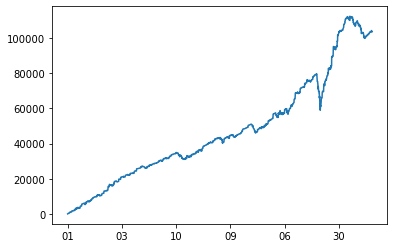

In [704]:
Table5['Total_P&L'].dropna().plot()

In [705]:
column_names = ["date", "spot_price", "expiry","type","year_week","day","ATR",
                "day_to_expiry","CE_OTM","PE_OTM","strangle","P&L","Total_P&L"]

In [706]:
trade = Table5

In [707]:
trade = trade.reindex(columns=column_names)

In [708]:
lists = [year_week,CE_OTM_Strike,PE_OTM_Strike]
df = pd.concat([pd.Series(x) for x in lists],axis=1)

In [709]:
df.columns = ('year_week','CE_OTM_Strike','PE_OTM_Strike')

In [710]:
trade['year_week'] = (trade['year_week'].astype('str'))

In [711]:
df['year_week'] = (df['year_week'].astype('str'))

In [712]:
trade_sheet = pd.merge(trade,df,how='left',on='year_week')

In [713]:
trade_sheet

,date,spot_price,expiry,type,year_week,day,ATR,day_to_expiry,CE_OTM,PE_OTM,strangle,P&L,Total_P&L,CE_OTM_Strike,PE_OTM_Strike
0,NaN,17423.4,2016-06-02 00:00:00,PE,2016-22,NaN,268.762855,1.0,3.30,13.85,-17.15,34.00,34.00,17800,17200
1,NaN,17567.8,2016-06-02 00:00:00,PE,2016-22,NaN,267.136937,0.0,0.10,0.10,-0.20,16.95,50.95,17800,17200
2,NaN,17511.8,2016-06-02 00:00:00,PE,2016-22,NaN,281.522792,6.0,54.25,84.15,-138.40,NaN,NaN,17800,17200
3,NaN,17520.7,2016-06-02 00:00:00,PE,2016-22,NaN,274.364021,3.0,37.30,49.45,-86.75,51.65,102.60,17800,17200
4,NaN,17620.9,2016-06-02 00:00:00,PE,2016-22,NaN,268.052305,2.0,37.10,14.05,-51.15,35.60,138.20,17800,17200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3030,NaN,29609.1,2020-12-31 00:00:00,PE,2020-53,NaN,724.773665,34.0,808.35,758.20,-1566.55,NaN,NaN,30200,29000
3031,NaN,30880.9,2020-12-31 00:00:00,PE,2020-53,NaN,607.659346,3.0,802.65,14.45,-817.10,-302.55,103811.70,30200,29000
3032,NaN,31322.5,2020-12-31 00:00:00,PE,2020-53,NaN,598.426536,2.0,1185.80,7.95,-1193.75,-376.65,103435.05,30200,29000
3033,NaN,31303.1,2020-12-31 00:00:00,PE,2020-53,NaN,591.610355,1.0,1151.45,3.75,-1155.20,38.55,103473.60,30200,29000


## theta

In [714]:
trade_sheet['call_theta'] = 0

for i in range(len(trade_sheet)):
    try:
        trade_sheet['call_theta'].iloc[i]= (mb.BS([trade_sheet.spot_price[i],trade_sheet.CE_OTM_Strike[i],0.05,trade_sheet.day_to_expiry[i]],volatility =20).callTheta)
    except:
        trade_sheet['call_theta'].iloc[i] = np.nan

In [715]:
trade_sheet['put_theta'] = 0

for i in range(len(trade_sheet)):
    try:
        trade_sheet['put_theta'].iloc[i] = (mb.BS([trade_sheet.spot_price[i],trade_sheet.PE_OTM_Strike[i],0.05,trade_sheet.day_to_expiry[i]],volatility = 20).putTheta)
    except:
        trade_sheet['put_theta'].iloc[i] = np.nan

## Find Delta

In [716]:
trade_sheet['call_delta'] = 0

for i in range(len(trade_sheet)):
    try:
        trade_sheet['call_delta'].iloc[i] = (mb.BS([trade_sheet.spot_price[i],trade_sheet.CE_OTM_Strike[i],0.05,trade_sheet.day_to_expiry[i]],volatility = 20).callDelta)
    except:
        trade_sheet['call_delta'].iloc[i] = np.nan

In [717]:
trade_sheet['put_delta'] = 0

for i in range(len(trade_sheet)):
    try:
        trade_sheet['put_delta'].iloc[i] = (mb.BS([trade_sheet.spot_price[i],trade_sheet.PE_OTM_Strike[i],0.05,trade_sheet.day_to_expiry[i]],volatility = 20).putDelta)
    except:
        trade_sheet['put_delta'].iloc[i] = np.nan

#### Calculate the Max drawdown in the past window days for each day

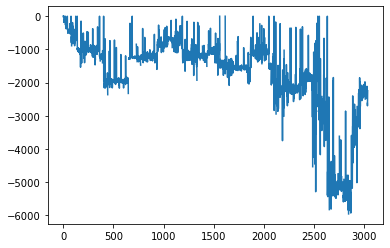

In [718]:
trade_sheet['rolling_max']= trade_sheet['P&L'].rolling(250,min_periods=1).max()
trade_sheet['daily_drawdown'] = trade_sheet['P&L']-trade_sheet['rolling_max']
trade_sheet['daily_drawdown'].plot()

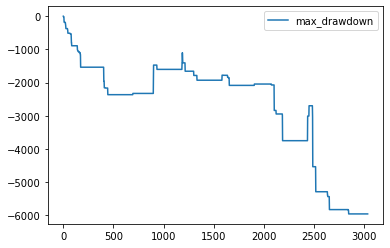

In [719]:
trade_sheet['max_drawdown']= trade_sheet['daily_drawdown'].rolling(250,min_periods=1).min()
trade_sheet['max_drawdown'].plot(label='max_drawdown')
plt.legend(loc='best')

## heatmap

----->>

In [720]:
df = trade_sheet.groupby('year_week').sum()
df.reset_index(inplace=True)

#df['year_week'] = df["year_week"].apply(lambda x: pd.to_datetime(x,format='%Y-%W')).astype('str')
df[['year','week']] = df.year_week.str.split("-",expand=True)
# df['year'] = pd.to_datetime(trade_sheet['expiry']).dt.year.astype('str') 
# df['week'] = pd.to_datetime(trade_sheet['expiry']).dt.week.astype('str')

# df.index = pd.to_datetime(df.index)
# df['month'] = [i.month for i in df.index]
# df['year'] = [i.year for i in df.index]

df.head()

,year_week,spot_price,ATR,day_to_expiry,CE_OTM,PE_OTM,strangle,P&L,Total_P&L,CE_OTM_Strike,PE_OTM_Strike,call_theta,put_theta,call_delta,put_delta,rolling_max,daily_drawdown,max_drawdown,year,week
0,2016-22,87644.6,1359.838910,12.0,132.05,161.60,-293.65,138.20,325.75,89000,86000,-52.142297,-47.688894,0.731069,-0.547911,205.3,-33.10,-68.20,2016,22
1,2016-23,176779.5,2623.637347,59.0,1398.20,1004.90,-2403.10,383.55,4019.30,178000,172000,-138.347646,-65.281425,3.854485,-1.559995,1626.1,-1076.55,-1484.40,2016,23
2,2016-24,265463.6,3851.611349,141.0,2974.10,2634.75,-5608.85,587.40,11691.95,267000,258000,-189.306393,-91.030465,6.339086,-2.477547,3810.5,-2925.05,-3971.50,2016,24
3,2016-25,336297.3,4848.228841,255.0,5050.20,4944.35,-9994.55,637.80,24814.60,338200,326800,-200.981023,-120.443602,7.725199,-3.728447,7054.8,-5964.30,-7738.25,2016,25
4,2016-26,389392.7,5732.426805,335.0,4965.45,2838.00,-7803.45,451.90,43226.45,391600,378400,-224.826832,-149.374545,8.852030,-4.629399,9959.4,-9507.50,-11311.25,2016,26


In [721]:
# df.index.astype('str')

In [722]:
results = df.groupby(['year','week'])

Return = pd.DataFrame(results['P&L'].apply(lambda row:row.iloc[0]).reset_index())
Return_df = Return.pivot(index='year',columns='week',values ='P&L')
#Return_df = Return_df.sort_values(by=week)
Return_df = Return_df[['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31','32','33','34','35','36','37','38','39','40','41','42','43','44','45','46','47','48','49','50','51','52']]
# Return_df.columns = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

In [723]:
# Return_df.to_csv('return.csv')

In [724]:
Return_df

week,1,2,3,4,5,6,7,8,9,10,...,43,44,45,46,47,48,49,50,51,52
year,,,,,,,,,,,,,,,,,,,,,
2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,534.85,39.25,42.05,906.25,-527.15,117.65,283.00,1057.50,1213.10,504.15
2017,64.65,1942.40,921.80,-469.15,195.85,1338.5,1094.85,-278.85,43.95,177.00,...,-86.15,-33.10,773.25,554.75,174.55,416.90,79.20,683.90,858.55,413.25
2018,26.40,101.60,154.75,-1130.45,263.80,-672.7,-59.85,-1426.90,63.50,-123.05,...,690.15,-186.30,-200.15,1065.05,375.65,-1058.15,-98.55,383.35,613.70,613.85
2019,80.15,209.25,1441.60,1289.25,514.10,106.7,242.25,1289.90,484.50,-172.35,...,1925.00,1186.25,188.55,2302.55,3223.00,-351.20,110.85,291.85,2827.20,649.10
2020,50.95,161.00,1987.60,1302.60,-565.35,490.0,790.55,1815.90,890.60,390.00,...,-137.80,-1478.10,-1328.85,-2748.05,0.00,-3017.20,381.25,480.10,544.75,1511.50


In [725]:
x=Return_df.T

In [726]:
def color_positive_green(val):
    if val > 0:
        color = 'green'
    else:
        color = 'red'
    return 'background-color:%s'%color

In [727]:
heatmap = Return_df.style.applymap(color_positive_green).set_precision(2)

In [728]:
heatmap

week,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52
year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,138.20,383.55,587.40,637.80,451.90,32.25,567.90,817.95,-270.15,29.00,1114.50,1175.90,423.70,-139.20,222.85,734.40,377.30,367.65,146.45,825.45,664.80,534.85,39.25,42.05,906.25,-527.15,117.65,283.00,1057.50,1213.10,504.15
2017,64.65,1942.40,921.80,-469.15,195.85,1338.50,1094.85,-278.85,43.95,177.00,1260.75,1296.05,-171.20,60.20,170.30,1035.65,-155.30,33.10,84.05,986.55,-82.30,54.85,168.40,1188.35,1332.20,360.20,40.30,610.30,104.90,-913.30,46.00,30.50,1009.60,753.70,420.60,31.85,230.05,378.30,287.75,50.65,319.15,793.10,-86.15,-33.10,773.25,554.75,174.55,416.90,79.20,683.90,858.55,413.25
2018,26.40,101.60,154.75,-1130.45,263.80,-672.70,-59.85,-1426.90,63.50,-123.05,632.60,767.70,-17.35,71.35,-123.00,1247.85,379.40,35.00,271.80,1008.55,754.90,-603.05,145.65,1415.30,1427.25,476.10,58.55,379.00,856.50,-50.45,41.80,253.25,1026.25,1024.20,422.20,26.20,-558.25,-192.70,-2105.95,172.25,462.20,2144.65,690.15,-186.30,-200.15,1065.05,375.65,-1058.15,-98.55,383.35,613.70,613.85
2019,80.15,209.25,1441.60,1289.25,514.10,106.70,242.25,1289.90,484.50,-172.35,-1181.50,-1275.20,-2409.20,224.15,470.35,1485.35,573.45,46.05,-292.15,739.55,1178.80,403.25,142.75,322.00,1923.55,602.20,110.15,354.35,2736.25,-859.75,-279.55,-401.30,1728.95,401.25,-880.85,199.90,435.65,2072.45,-1348.05,-482.20,615.85,1719.05,1925.00,1186.25,188.55,2302.55,3223.00,-351.20,110.85,291.85,2827.20,649.10
2020,50.95,161.00,1987.60,1302.60,-565.35,490.00,790.55,1815.90,890.60,390.00,-4309.80,-5636.20,-7959.45,592.25,3683.95,3757.85,4290.60,2615.80,848.20,1561.50,3121.10,2084.30,-130.55,5533.65,4876.05,-317.40,693.85,3400.80,5135.05,378.55,1782.80,442.05,2168.05,3014.45,-232.35,-103.15,-885.10,1868.00,-2457.40,-476.10,-1130.40,1028.70,-137.80,-1478.10,-1328.85,-2748.05,0.00,-3017.20,381.25,480.10,544.75,1511.50


In [729]:
# !pip3 install dataframe_image
# import dataframe_image as dfi 
# dfi.export(x, 'Retrun_week.png')

In [730]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
import cufflinks as cf
import pandas as pd
import numpy as np

#Enabling the offline mode for interactive plotting locally
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()

#To display the plots
%matplotlib inline

## tradesheet with stop loss

In [731]:
df_with_sl = pd.DataFrame(columns = [ 'date', 'spot_price', 'expiry', 'type', 'year_week',
       'day', 'ATR', 'PE_OTM', 'day_to_expiry', 'CE_OTM', 'strangle', 'P&L',
       'Total_P&L', 'CE_OTM_Strike', 'PE_OTM_Strike', 'call_theta',
       'put_theta', 'call_delta', 'put_delta', 'new_strangle',
       'exit_condition', 'cum_pnl', 'exit_flag', 'rank'])

stoploss_ptg = 50
for year_week in trade_sheet['year_week'].unique():
    df_new = pd.DataFrame()
    df_new = trade_sheet[trade_sheet['year_week'] == year_week]

    df_new['new_strangle'] = df_new['strangle'].iloc[0]
    df_new['exit_condition']= round((df_new['new_strangle']*stoploss_ptg)/100,2) 
    df_new['cum_pnl'] = df_new['P&L'].cumsum()
    df_new['exit_flag'] = np.where(df_new['cum_pnl'].abs() > df_new['exit_condition'].abs(),1,0)
   
    df_new['rank']= df_new.groupby(['exit_flag'])['exit_flag'].rank(method = 'first')

    df_new.drop(df_new[(df_new['exit_flag']==True) & (df_new['rank'] > 1.0)].index, inplace = True)

#     del df_new['Unnamed: 0']
    df_with_sl = pd.concat([df_with_sl,df_new])


In [732]:
df_with_sl.head()

,date,spot_price,expiry,type,year_week,day,ATR,PE_OTM,day_to_expiry,CE_OTM,...,call_delta,put_delta,new_strangle,exit_condition,cum_pnl,exit_flag,rank,rolling_max,daily_drawdown,max_drawdown
0,NaN,17423.4,2016-06-02 00:00:00,PE,2016-22,NaN,268.762855,13.85,1.0,3.30,...,0.020806,-0.107841,-17.15,-8.57,34.0,1,1.0,34.0,0.0,0.00
2,NaN,17511.8,2016-06-02 00:00:00,PE,2016-22,NaN,281.522792,84.15,6.0,54.25,...,0.266498,-0.237688,-17.15,-8.57,NaN,0,1.0,34.0,NaN,-17.05
5,NaN,17423.4,2016-06-09 00:00:00,PE,2016-23,NaN,268.762855,120.00,8.0,189.05,...,0.239770,-0.325992,-309.05,-154.52,132.1,0,1.0,132.1,0.0,-17.05
6,NaN,17567.8,2016-06-09 00:00:00,PE,2016-23,NaN,267.136937,56.85,7.0,86.20,...,0.322797,-0.218251,-309.05,-154.52,298.1,1,1.0,166.0,0.0,-17.05
12,NaN,17511.8,2016-06-09 00:00:00,PE,2016-23,NaN,281.522792,252.10,13.0,189.05,...,0.339756,-0.310187,-309.05,-154.52,NaN,0,2.0,166.0,NaN,-184.35


In [733]:

with_sl = df_with_sl.groupby('year_week').sum()
with_sl.reset_index(inplace=True)

with_sl[['year','week']] = with_sl.year_week.str.split("-",expand=True)

with_sl.head()

results_with_sl = df.groupby(['year','week'])

Return_with_sl = pd.DataFrame(results['P&L'].apply(lambda row:row.iloc[0]).reset_index())
Return_df_with_sl = Return.pivot(index='year',columns='week',values ='P&L')


Return_df_with_sl = Return_df_with_sl[['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31','32','33','34','35','36','37','38','39','40','41','42','43','44','45','46','47','48','49','50','51','52']]

# with_sl['month'] = [i.month for i in with_sl.index]
# with_sl['year'] = [i.year for i in with_sl.index]

# results_with_sl = with_sl.groupby(['year','month'])
# Return_SL = pd.DataFrame(results_with_sl['P&L'].apply(lambda row:row.iloc[0]).reset_index())
# Return_df_SL = Return_SL.pivot(index='year',columns='month',values ='P&L')

# Return_df_SL.columns = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']


In [734]:
Return_df_with_sl

week,1,2,3,4,5,6,7,8,9,10,...,43,44,45,46,47,48,49,50,51,52
year,,,,,,,,,,,,,,,,,,,,,
2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,534.85,39.25,42.05,906.25,-527.15,117.65,283.00,1057.50,1213.10,504.15
2017,64.65,1942.40,921.80,-469.15,195.85,1338.5,1094.85,-278.85,43.95,177.00,...,-86.15,-33.10,773.25,554.75,174.55,416.90,79.20,683.90,858.55,413.25
2018,26.40,101.60,154.75,-1130.45,263.80,-672.7,-59.85,-1426.90,63.50,-123.05,...,690.15,-186.30,-200.15,1065.05,375.65,-1058.15,-98.55,383.35,613.70,613.85
2019,80.15,209.25,1441.60,1289.25,514.10,106.7,242.25,1289.90,484.50,-172.35,...,1925.00,1186.25,188.55,2302.55,3223.00,-351.20,110.85,291.85,2827.20,649.10
2020,50.95,161.00,1987.60,1302.60,-565.35,490.0,790.55,1815.90,890.60,390.00,...,-137.80,-1478.10,-1328.85,-2748.05,0.00,-3017.20,381.25,480.10,544.75,1511.50


In [735]:
def color_positive_green(val):
    if val > 0:
        color = 'mediumspringgreen'#'#01B8AA'#'green
    else:
        color = 'lightcoral'#'#FD625E'#'red'
    return 'background-color:%s'%color

In [736]:
Return_df_with_sl = Return_df_with_sl.style.applymap(color_positive_green).set_precision(2)

In [737]:
Return_df_with_sl

week,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52
year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,138.20,383.55,587.40,637.80,451.90,32.25,567.90,817.95,-270.15,29.00,1114.50,1175.90,423.70,-139.20,222.85,734.40,377.30,367.65,146.45,825.45,664.80,534.85,39.25,42.05,906.25,-527.15,117.65,283.00,1057.50,1213.10,504.15
2017,64.65,1942.40,921.80,-469.15,195.85,1338.50,1094.85,-278.85,43.95,177.00,1260.75,1296.05,-171.20,60.20,170.30,1035.65,-155.30,33.10,84.05,986.55,-82.30,54.85,168.40,1188.35,1332.20,360.20,40.30,610.30,104.90,-913.30,46.00,30.50,1009.60,753.70,420.60,31.85,230.05,378.30,287.75,50.65,319.15,793.10,-86.15,-33.10,773.25,554.75,174.55,416.90,79.20,683.90,858.55,413.25
2018,26.40,101.60,154.75,-1130.45,263.80,-672.70,-59.85,-1426.90,63.50,-123.05,632.60,767.70,-17.35,71.35,-123.00,1247.85,379.40,35.00,271.80,1008.55,754.90,-603.05,145.65,1415.30,1427.25,476.10,58.55,379.00,856.50,-50.45,41.80,253.25,1026.25,1024.20,422.20,26.20,-558.25,-192.70,-2105.95,172.25,462.20,2144.65,690.15,-186.30,-200.15,1065.05,375.65,-1058.15,-98.55,383.35,613.70,613.85
2019,80.15,209.25,1441.60,1289.25,514.10,106.70,242.25,1289.90,484.50,-172.35,-1181.50,-1275.20,-2409.20,224.15,470.35,1485.35,573.45,46.05,-292.15,739.55,1178.80,403.25,142.75,322.00,1923.55,602.20,110.15,354.35,2736.25,-859.75,-279.55,-401.30,1728.95,401.25,-880.85,199.90,435.65,2072.45,-1348.05,-482.20,615.85,1719.05,1925.00,1186.25,188.55,2302.55,3223.00,-351.20,110.85,291.85,2827.20,649.10
2020,50.95,161.00,1987.60,1302.60,-565.35,490.00,790.55,1815.90,890.60,390.00,-4309.80,-5636.20,-7959.45,592.25,3683.95,3757.85,4290.60,2615.80,848.20,1561.50,3121.10,2084.30,-130.55,5533.65,4876.05,-317.40,693.85,3400.80,5135.05,378.55,1782.80,442.05,2168.05,3014.45,-232.35,-103.15,-885.10,1868.00,-2457.40,-476.10,-1130.40,1028.70,-137.80,-1478.10,-1328.85,-2748.05,0.00,-3017.20,381.25,480.10,544.75,1511.50


In [738]:
del df_with_sl['rolling_max']
del df_with_sl['daily_drawdown']
del df_with_sl['max_drawdown']

## Calculate the Max drawdown in the past window days for each day

In [739]:
df_with_sl['rolling_max']= df_with_sl['P&L'].rolling(250,min_periods=1).max()
df_with_sl['daily_drawdown'] = df_with_sl['P&L']-trade_sheet['rolling_max']

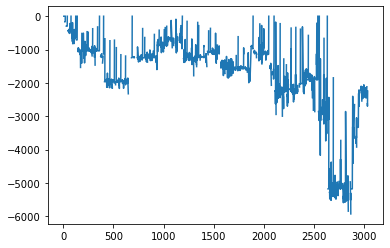

In [740]:
df_with_sl['daily_drawdown'].plot()

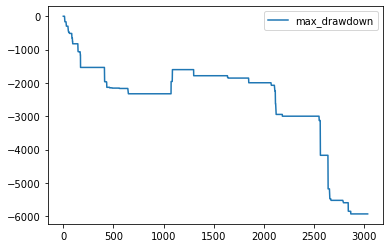

In [741]:
df_with_sl['max_drawdown']= df_with_sl['daily_drawdown'].rolling(250,min_periods=1).min()
df_with_sl['max_drawdown'].plot(label='max_drawdown')
plt.legend(loc='best')

In [742]:
df_with_sl['Total_P&L']=df_with_sl['P&L'].cumsum()

In [743]:
df_with_sl.index = df_with_sl.expiry

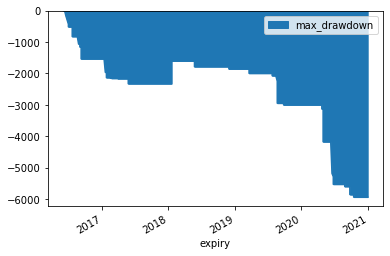

In [744]:
df_with_sl['max_drawdown'].plot(kind='area',label='max_drawdown')
# df_with_sl['P&L'].plot(kind='area',label='P&L')
plt.legend(loc='best')

In [745]:
# trade_sheet['Total_P&L'].plot(label='Profit without SL')

# df_with_sl['Total_P&L'].plot(label='Profit with SL')
# plt.legend(loc='best')

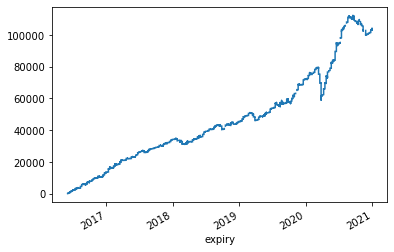

In [746]:
trade_sheet.index = trade_sheet.expiry
trade_sheet['Total_P&L'].plot()

## P&L without Stop loss

In [747]:
trade_sheet['P&L'].sum()

103549.4

## P&L with Stop loss

In [748]:
df_with_sl['P&L'].sum()

96909.54999999999

In [749]:
df_with_sl['Total_P&L'][-2]

96833.74999999993

### Trade Analysis

In [750]:
trades = df_with_sl.groupby('year_week').sum()

reports = []

total_trades = len(trades)
total_profit_loss =df_with_sl['Total_P&L'][-2]# refer above line
largest_Profit=round(trades['P&L'].max())
largest_loss = round(trades['P&L'].min())
Average_Profit_Loss = round(trades['P&L'].mean())
profit_trades = len(trades[trades['P&L'] > 0])
loss_trades = len(trades[trades['P&L'] < 0])
trades['loss_count'] = np.where(trades['P&L'] < 0, 1, 0)
trades['lc'] = (trades['loss_count'].diff(1) != 0).cumsum()
max_con_loss = trades[trades['loss_count'] == 1].groupby('lc').size().max()
max_con_profit = trades[trades['loss_count'] == 0].groupby('lc').size().max()
max_drawdown = df_with_sl['max_drawdown'].min()
sharpe_ratio = round(round(trades['P&L'].mean())/round(trades['P&L'].std()),2)

reports.append(dict(title='Total Trades', value=total_trades))
reports.append(dict(title='Total Profit & Loss', value=total_profit_loss))
reports.append(dict(title='Largest Profit', value=largest_Profit))
reports.append(dict(title='Largest Loss', value=largest_loss))
reports.append(dict(title='Average Profit & Loss', value=Average_Profit_Loss))
reports.append(dict(title='Profitable Trades', value=profit_trades))
reports.append(dict(title='Losing Trades', value=loss_trades))
reports.append(dict(title='Max Con. Loss', value=max_con_loss))
reports.append(dict(title='Max Con. Profit', value=max_con_profit))
reports.append(dict(title='Max Downdown', value=max_drawdown))
# reports.append(dict(title='Sharpe Ratio', value=sharpe_ratio))

In [751]:
import pprint
pprint.pprint(reports)

[{'title': 'Total Trades', 'value': 240},
 {'title': 'Total Profit & Loss', 'value': 96833.74999999993},
 {'title': 'Largest Profit', 'value': 5182},
 {'title': 'Largest Loss', 'value': -1758},
 {'title': 'Average Profit & Loss', 'value': 404},
 {'title': 'Profitable Trades', 'value': 183},
 {'title': 'Losing Trades', 'value': 56},
 {'title': 'Max Con. Loss', 'value': 7},
 {'title': 'Max Con. Profit', 'value': 13},
 {'title': 'Max Downdown', 'value': -5933.250000000001}]


In [752]:
report_df = pd.DataFrame(reports)
report_df

,title,value
0,Total Trades,240.00
1,Total Profit & Loss,96833.75
2,Largest Profit,5182.00
3,Largest Loss,-1758.00
4,Average Profit & Loss,404.00
5,Profitable Trades,183.00
6,Losing Trades,56.00
7,Max Con. Loss,7.00
8,Max Con. Profit,13.00
9,Max Downdown,-5933.25


In [753]:
trade_sheet['P&L'].sum()/trade_sheet['P&L'].std()

310.3856409402775

In [754]:
df_with_sl['P&L'].sum()/df_with_sl['P&L'].std()

269.82193797421104

In [755]:
round(round(trades['P&L'].mean())/round(trades['P&L'].std()),2)

0.46

In [756]:
trades['P&L'].mean()/trades['P&L'].std()

0.46416363469960276

## `Report selection`

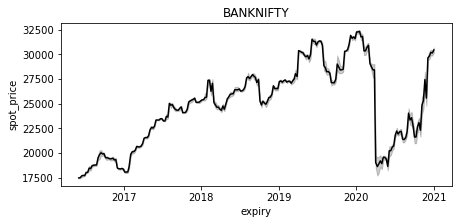

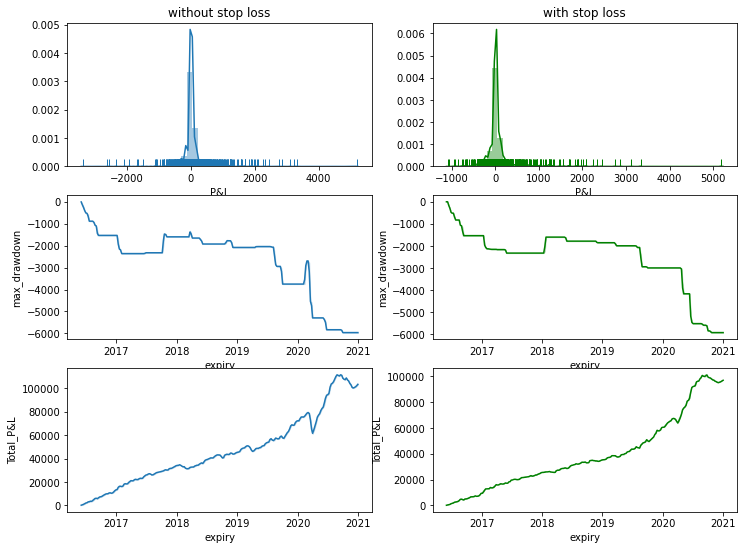

In [760]:
fig_dims = (7,3)
fig, ax = plt.subplots(figsize=fig_dims)
sns.lineplot(data=df_with_sl, y='spot_price',x='expiry',color='k', ax=ax) # spot value chart 
plt.title(select_contract)

fig, axes = plt.subplots(3, 2, figsize=(12,9))
sns.distplot(trade_sheet['P&L'],rug=True,ax=axes[0,0]) # profit and loss  histrogram without stop loss 
axes[0,0].set_title('without stop loss')

sns.distplot(df_with_sl['P&L'],color ='g',rug=True,ax=axes[0,1]) # profit and loss histrogram with stop loss
axes[0,1].set_title('with stop loss')

sns.lineplot(data=trade_sheet,y='max_drawdown',x='expiry',ax=axes[1,0]) # max drawdown chart without stop loss
# axes[1,0].set_title('without stop loss')

sns.lineplot(data=df_with_sl,x='expiry',y='max_drawdown',color='g',ax=axes[1,1]) # max drawdown chart with stop loss
# axes[1,1].set_title('with stop loss')

sns.lineplot(data=trade_sheet, y='Total_P&L',x= 'expiry',ax=axes[2,0]) # profit and loss chart without stop loss

sns.lineplot(data=df_with_sl, y='Total_P&L',x='expiry',color ='g',ax=axes[2,1]) # profit and loss chart with stop loss


In [758]:
trades = df.groupby('year_week').sum()

reports = []

total_trades = len(trades)
total_profit_loss =df_with_sl['Total_P&L'][-2]# refer above line
largest_Profit=round(trades['P&L'].max())
largest_loss = round(trades['P&L'].min())
Average_Profit_Loss = round(trades['P&L'].mean())
profit_trades = len(trades[trades['P&L'] > 0])
loss_trades = len(trades[trades['P&L'] < 0])
trades['loss_count'] = np.where(trades['P&L'] < 0, 1, 0)
trades['lc'] = (trades['loss_count'].diff(1) != 0).cumsum()
max_con_loss = trades[trades['loss_count'] == 1].groupby('lc').size().max()
max_con_profit = trades[trades['loss_count'] == 0].groupby('lc').size().max()
max_drawdown = df_with_sl['max_drawdown'].min()
sharpe_ratio = round(round(trades['P&L'].mean())/round(trades['P&L'].std()),2)

reports.append(dict(title='Total Trades', value=total_trades))
reports.append(dict(title='Total Profit & Loss', value=total_profit_loss))
reports.append(dict(title='Largest Profit', value=largest_Profit))
reports.append(dict(title='Largest Loss', value=largest_loss))
reports.append(dict(title='Average Profit & Loss', value=Average_Profit_Loss))
reports.append(dict(title='Profitable Trades', value=profit_trades))
reports.append(dict(title='Losing Trades', value=loss_trades))
reports.append(dict(title='Max Con. Loss', value=max_con_loss))
reports.append(dict(title='Max Con. Profit', value=max_con_profit))
reports.append(dict(title='Max Downdown', value=max_drawdown))
# reports.append(dict(title='Sharpe Ratio', value=sharpe_ratio))

In [759]:
report_df = pd.DataFrame(reports)
report_df

,title,value
0,Total Trades,240.00
1,Total Profit & Loss,96833.75
2,Largest Profit,5534.00
3,Largest Loss,-7959.00
4,Average Profit & Loss,431.00
5,Profitable Trades,183.00
6,Losing Trades,56.00
7,Max Con. Loss,4.00
8,Max Con. Profit,12.00
9,Max Downdown,-5933.25
